# 100 pandas puzzles

Inspired by [100 Numpy exerises](https://github.com/rougier/numpy-100), here are 100* short puzzles for testing your knowledge of [pandas'](http://pandas.pydata.org/) power.

Since pandas is a large library with many different specialist features and functions, these excercises focus mainly on the fundamentals of manipulating data (indexing, grouping, aggregating, cleaning), making use of the core DataFrame and Series objects. 

Many of the excerises here are stright-forward in that the solutions require no more than a few lines of code (in pandas or NumPy... don't go using pure Python or Cython!). Choosing the right methods and following best practices is the underlying goal.

The exercises are loosely divided in sections. Each section has a difficulty rating; these ratings are subjective, of course, but should be a seen as a rough guide as to how inventive the required solution is.

If you're just starting out with pandas and you are looking for some other resources, the official documentation  is very extensive. In particular, some good places get a broader overview of pandas are...

- [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [pandas basics](http://pandas.pydata.org/pandas-docs/stable/basics.html)
- [tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [cookbook and idioms](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

Enjoy the puzzles!

\* *the list of exercises is not yet complete! Pull requests or suggestions for additional exercises, corrections and improvements are welcomed.*

## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy* 

**1.** Import pandas under the name `pd`.

In [1]:
import pandas as pd
import numpy as np

**2.** Print the version of pandas that has been imported.

In [2]:
pd.__version__

'0.23.0'

**3.** Print out all the version information of the libraries that are required by the pandas library.

In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.5.2.final.0
python-bits: 64
OS: Linux
OS-release: 4.4.0-17134-Microsoft
machine: x86_64
processor: x86_64
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8

pandas: 0.23.0
pytest: None
pip: 8.1.1
setuptools: 39.2.0
Cython: None
numpy: 1.14.3
scipy: None
pyarrow: None
xarray: None
IPython: 6.4.0
sphinx: None
patsy: None
dateutil: 2.7.3
pytz: 2018.4
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 2.2.2
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml: None
bs4: 4.6.0
html5lib: 0.999
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [4]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


**5.** Display a summary of the basic information about this DataFrame and its data.

In [5]:
# df.info() or df.describe()
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes
None


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**6.** Return the first 3 rows of the DataFrame `df`.

In [6]:
# df.head(3) or df.iloc[:3]
df.head(3)
df.iloc[:3]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [7]:
# df[[]] or df.loc[:, []]
df[["animal", "age"]]
df.loc[:, ["animal", "age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [8]:
df.loc[df.index[[3, 4, 8]], ["animal", "age"]]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [9]:
df[df["visits"] > 3]

,age,animal,priority,visits


**10.** Select the rows where the age is missing, i.e. is `NaN`.

In [10]:
df[df["age"].isnull()]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [11]:
df[(df["animal"] == "cat") & (df["age"] < 3)]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [12]:
# df["age"].between() or df["age"] >= 2 ...
df[df["age"].between(2, 4)]
df[(df["age"] >= 2) & (df["age"] <= 4)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


**13.** Change the age in row 'f' to 1.5.

In [13]:
df.loc["f", "age"] = 1.5
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


**14.** Calculate the sum of all visits (the total number of visits).

In [14]:
df[["visits"]].sum()
df["visits"].sum()

19

**15.** Calculate the mean age for each different animal in `df`.

In [15]:
df.groupby("animal")["age"].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [16]:
print("Original DataFrame: \n{}\n".format(df))
df.loc["k"] = [2.5, "matt", "yes", 5]
print("Added row k to DataFrame: \n{}\n".format(df))
df = df.drop("k")
print("Dropped row k from DataFrame: \n{}".format(df))

Original DataFrame: 
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1

Added row k to DataFrame: 
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1
k  2.5   matt      yes       5

Dropped row k from DataFrame: 
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       

**17.** Count the number of each type of animal in `df`.

In [17]:
df.groupby("animal").size()
df["animal"].value_counts()

dog      4
cat      4
snake    2
Name: animal, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

In [18]:
df.sort_values(by=["age", "visits"], ascending=[False, True])
df.sort_values(["age", "visits"], ascending=[False, True])

,age,animal,priority,visits
i,7.0,dog,no,2
e,5.0,dog,no,2
g,4.5,snake,no,1
j,3.0,dog,no,1
b,3.0,cat,yes,3
a,2.5,cat,yes,1
f,1.5,cat,no,3
c,0.5,snake,no,2
h,NaN,cat,yes,1
d,NaN,dog,yes,3


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [19]:
print("Original DataFrame: \n{}\n".format(df))
df["priority"] = df["priority"].map({"yes": True, "no": False})
print("New DataFrame with booleans for priority column: \n{}".format(df))

Original DataFrame: 
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1

New DataFrame with booleans for priority column: 
   age animal  priority  visits
a  2.5    cat      True       1
b  3.0    cat      True       3
c  0.5  snake     False       2
d  NaN    dog      True       3
e  5.0    dog     False       2
f  1.5    cat     False       3
g  4.5  snake     False       1
h  NaN    cat      True       1
i  7.0    dog     False       2
j  3.0    dog     False       1


**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [20]:
print("Original DataFrame: \n{}\n".format(df))
df["animal"] = df["animal"].map({"snake": "python",
                                "cat": "cat",
                                "dog": "dog"})
print("New DataFrame with booleans for priority column: \n{}".format(df))

Original DataFrame: 
   age animal  priority  visits
a  2.5    cat      True       1
b  3.0    cat      True       3
c  0.5  snake     False       2
d  NaN    dog      True       3
e  5.0    dog     False       2
f  1.5    cat     False       3
g  4.5  snake     False       1
h  NaN    cat      True       1
i  7.0    dog     False       2
j  3.0    dog     False       1

New DataFrame with booleans for priority column: 
   age  animal  priority  visits
a  2.5     cat      True       1
b  3.0     cat      True       3
c  0.5  python     False       2
d  NaN     dog      True       3
e  5.0     dog     False       2
f  1.5     cat     False       3
g  4.5  python     False       1
h  NaN     cat      True       1
i  7.0     dog     False       2
j  3.0     dog     False       1


**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [21]:
df.pivot_table(index="animal", columns="visits", values="age", aggfunc="mean")

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

In [22]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df.loc[df["A"] != df["A"].shift()] # More specific solution

df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df.drop_duplicates(subset="A") # Drops all duplicates

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [23]:
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
print("Original random DataFrame: \n{}\n".format(df))
print("Means of each row: \n{}\n".format(df.mean(1)))
print("New DataFrame where the row mean is subtracted from each element in row:")
df.sub(df.mean(1), 0) # axis=1, axis=0

Original random DataFrame: 
          0         1         2
0  0.336329  0.640937  0.039005
1  0.768933  0.418739  0.753091
2  0.888853  0.889580  0.551572
3  0.528314  0.007217  0.195757
4  0.031137  0.110081  0.591968

Means of each row: 
0    0.338757
1    0.646921
2    0.776668
3    0.243763
4    0.244396
dtype: float64

New DataFrame where the row mean is subtracted from each element in row:


,0,1,2
0,-0.002428,0.302180,-0.299752
1,0.122012,-0.228182,0.106170
2,0.112185,0.112912,-0.225097
3,0.284551,-0.236546,-0.048006
4,-0.213258,-0.134315,0.347573


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

In [24]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
print("Random DataFrame with 10 columns of real numbers: \n{}\n".format(df))
print("Column with smallest sum: \n{}".format(df.sum().idxmin()))

Random DataFrame with 10 columns of real numbers: 
          a         b         c         d         e         f         g  \
0  0.499764  0.775496  0.335903  0.384580  0.979868  0.916942  0.050966   
1  0.247951  0.889678  0.142750  0.105456  0.157103  0.398955  0.369869   
2  0.246558  0.890734  0.171531  0.173463  0.143257  0.949562  0.362390   
3  0.691536  0.907675  0.363626  0.129099  0.710313  0.307235  0.440306   
4  0.740526  0.927466  0.988451  0.116260  0.820710  0.709011  0.084177   

          h         i         j  
0  0.377432  0.161315  0.218262  
1  0.925987  0.482035  0.313100  
2  0.338500  0.640426  0.792686  
3  0.841652  0.386085  0.756929  
4  0.259318  0.570923  0.998563  

Column with smallest sum: 
d


**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

In [25]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
print("Example DataFrame with duplicates: \n{}\n".format(df))
print("Number of unique rows the DataFrame has:")
print(len(df) - df.duplicated().sum())
print(len(df.drop_duplicates()))
print(df.drop_duplicates().count())

Example DataFrame with duplicates: 
    A
0   1
1   2
2   2
3   3
4   4
5   5
6   5
7   5
8   6
9   7
10  7

Number of unique rows the DataFrame has:
7
7
A    7
dtype: int64


The next three puzzles are slightly harder...

**26.** You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value.

(You should return a Series of column labels.)

In [26]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list("abcdefghij"))
for i in list("acefj"):
    for j in range(5):
        df.loc[j, i] = np.nan
print("DataFrame with 10 columns of floating-point numbers, 5 entries in each row are NaN: \n{}\n".format(df))
(df.isnull().cumsum(axis=1) == 3).idxmax(axis=1)

DataFrame with 10 columns of floating-point numbers, 5 entries in each row are NaN: 
    a         b   c         d   e   f         g         h         i   j
0 NaN  0.743204 NaN  0.326710 NaN NaN  0.246226  0.683887  0.256630 NaN
1 NaN  0.469729 NaN  0.652842 NaN NaN  0.663067  0.878289  0.105005 NaN
2 NaN  0.053889 NaN  0.454739 NaN NaN  0.425115  0.630353  0.328761 NaN
3 NaN  0.568275 NaN  0.520559 NaN NaN  0.650117  0.311550  0.072516 NaN
4 NaN  0.716406 NaN  0.206375 NaN NaN  0.799646  0.523242  0.949467 NaN



0    e
1    e
2    e
3    e
4    e
dtype: object

**27.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

In [27]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print("Given DataFrame: \n{}\n".format(df))
x = df.groupby("grps")["vals"].nlargest(3).sum(level=0)
print("Sum of each group's three largest values: \n{}".format(x))

Given DataFrame: 
   grps  vals
0     a    12
1     a   345
2     a     3
3     b     1
4     b    45
5     c    14
6     a     4
7     a    52
8     b    54
9     c    23
10    c   235
11    c    21
12    b    57
13    b     3
14    c    87

Sum of each group's three largest values: 
grps
a    409
b    156
c    345
Name: vals, dtype: int64


**28.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

In [28]:
df = pd.DataFrame({"A": np.arange(0, 101, 10),
                  "B": 0})
df.groupby(pd.cut(df["A"], np.arange(0, 101, 10)))["B"].sum()

A
(0, 10]      0
(10, 20]     0
(20, 30]     0
(30, 40]     0
(40, 50]     0
(50, 60]     0
(60, 70]     0
(70, 80]     0
(80, 90]     0
(90, 100]    0
Name: B, dtype: int64

## DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be `[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]`. Make this a new column 'Y'.

Here's an alternative approach based on a [cookbook recipe](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#grouping):

**30.** Consider a DataFrame containing rows and columns of purely numerical data. Create a list of the row-column index locations of the 3 largest values.

**31.** Given a DataFrame with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals', replace any negative values in 'vals' with the group mean.

**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [29]:
date_time_index = pd.date_range(start="2015-01-01", end="2015-12-31", freq="B")
s = pd.Series(np.random.rand(len(date_time_index)), index=date_time_index)
s

2015-01-01    0.128324
2015-01-02    0.335745
2015-01-05    0.221738
2015-01-06    0.273617
2015-01-07    0.885538
2015-01-08    0.048886
2015-01-09    0.822814
2015-01-12    0.966610
2015-01-13    0.252050
2015-01-14    0.403437
2015-01-15    0.832382
2015-01-16    0.455662
2015-01-19    0.322097
2015-01-20    0.787461
2015-01-21    0.229693
2015-01-22    0.657360
2015-01-23    0.822956
2015-01-26    0.984956
2015-01-27    0.858696
2015-01-28    0.008426
2015-01-29    0.058138
2015-01-30    0.239691
2015-02-02    0.693655
2015-02-03    0.457036
2015-02-04    0.139412
2015-02-05    0.271878
2015-02-06    0.964161
2015-02-09    0.177802
2015-02-10    0.605904
2015-02-11    0.148930
                ...   
2015-11-20    0.416679
2015-11-23    0.312496
2015-11-24    0.311089
2015-11-25    0.041696
2015-11-26    0.552579
2015-11-27    0.719462
2015-11-30    0.048904
2015-12-01    0.925985
2015-12-02    0.199084
2015-12-03    0.047876
2015-12-04    0.385457
2015-12-07    0.317619
2015-12-08 

**34.** Find the sum of the values in `s` for every Wednesday.

In [30]:
s[s.index.weekday == 2].sum() # DatetimeIndex: Monday=0, Sunday=6

22.298773472159706

**35.** For each calendar month in `s`, find the mean of values.

In [31]:
s.resample("M").mean()

2015-01-31    0.481649
2015-02-28    0.435715
2015-03-31    0.551249
2015-04-30    0.464140
2015-05-31    0.519054
2015-06-30    0.456899
2015-07-31    0.492146
2015-08-31    0.676749
2015-09-30    0.486887
2015-10-31    0.424106
2015-11-30    0.533047
2015-12-31    0.410169
Freq: M, dtype: float64

**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [32]:
s.groupby(pd.Grouper(freq="4M")).idxmax()

2015-01-31   2015-01-26
2015-05-31   2015-03-06
2015-09-30   2015-08-06
2016-01-31   2015-12-16
dtype: datetime64[ns]

**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [33]:
pd.date_range(start="2015-01-01", end="2016-12-31", freq="WOM-3THU")

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
(It's some flight data I made up; it's not meant to be accurate in any way.)


**38.** Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [34]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
print("Given DataFrame: \n{}\n".format(df))
df["FlightNumber"] = df["FlightNumber"].interpolate().astype(int)
print("DataFrame after filling in missing FlightNumbers: \n{}".format(df))

Given DataFrame: 
               Airline  FlightNumber           From_To  RecentDelays
0               KLM(!)       10045.0      LoNDon_paris      [23, 47]
1    <Air France> (12)           NaN      MAdrid_miLAN            []
2  (British Airways. )       10065.0  londON_StockhOlm  [24, 43, 87]
3       12. Air France           NaN    Budapest_PaRis          [13]
4          "Swiss Air"       10085.0   Brussels_londOn      [67, 32]

DataFrame after filling in missing FlightNumbers: 
               Airline  FlightNumber           From_To  RecentDelays
0               KLM(!)         10045      LoNDon_paris      [23, 47]
1    <Air France> (12)         10055      MAdrid_miLAN            []
2  (British Airways. )         10065  londON_StockhOlm  [24, 43, 87]
3       12. Air France         10075    Budapest_PaRis          [13]
4          "Swiss Air"         10085   Brussels_londOn      [67, 32]


**39.** The From\_To column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [35]:
temp = df.From_To.str.split("_", expand=True)
temp.columns = ["From", "To"]
print("Given DataFrame: \n{}\n".format(df))
print("Temporary DataFrame with individual From and To columns:")
temp

Given DataFrame: 
               Airline  FlightNumber           From_To  RecentDelays
0               KLM(!)         10045      LoNDon_paris      [23, 47]
1    <Air France> (12)         10055      MAdrid_miLAN            []
2  (British Airways. )         10065  londON_StockhOlm  [24, 43, 87]
3       12. Air France         10075    Budapest_PaRis          [13]
4          "Swiss Air"         10085   Brussels_londOn      [67, 32]

Temporary DataFrame with individual From and To columns:


,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [36]:
print("Original temp DataFrame: \n{}\n".format(temp))
temp["From"] = temp["From"].str.capitalize()
temp["To"] = temp["To"].str.capitalize()
print("Temp DataFrame with corrected capitalization:")
temp

Original temp DataFrame: 
       From         To
0    LoNDon      paris
1    MAdrid      miLAN
2    londON  StockhOlm
3  Budapest      PaRis
4  Brussels     londOn

Temp DataFrame with corrected capitalization:


,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


**41.** Delete the From_To column from `df` and attach the temporary DataFrame from the previous questions.

In [37]:
df = df.drop("From_To", axis=1)
df = df.join(temp)
df

,Airline,FlightNumber,RecentDelays,From,To
0,KLM(!),10045,"[23, 47]",London,Paris
1,<Air France> (12),10055,[],Madrid,Milan
2,(British Airways. ),10065,"[24, 43, 87]",London,Stockholm
3,12. Air France,10075,[13],Budapest,Paris
4,"""Swiss Air""",10085,"[67, 32]",Brussels,London


**42**. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [38]:
df["Airline"] = df["Airline"].str.extract("([A-Za-z\s]+)", expand=False).str.strip()
df

,Airline,FlightNumber,RecentDelays,From,To
0,KLM,10045,"[23, 47]",London,Paris
1,Air France,10055,[],Madrid,Milan
2,British Airways,10065,"[24, 43, 87]",London,Stockholm
3,Air France,10075,[13],Budapest,Paris
4,Swiss Air,10085,"[67, 32]",Brussels,London


**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [39]:
delays = df["RecentDelays"].apply(pd.Series)
delays.columns = ["delay_{}".format(n) for n in range(len(delays.columns))]
df = df.drop("RecentDelays", axis=1).join(delays)
df

,Airline,FlightNumber,From,To,delay_0,delay_1,delay_2
0,KLM,10045,London,Paris,23.0,47.0,NaN
1,Air France,10055,Madrid,Milan,NaN,NaN,NaN
2,British Airways,10065,London,Stockholm,24.0,43.0,87.0
3,Air France,10075,Budapest,Paris,13.0,NaN,NaN
4,Swiss Air,10085,Brussels,London,67.0,32.0,NaN


The DataFrame should look much better now.

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with [Minesweeper](https://en.wikipedia.org/wiki/Minesweeper_(video_game). If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid. 

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

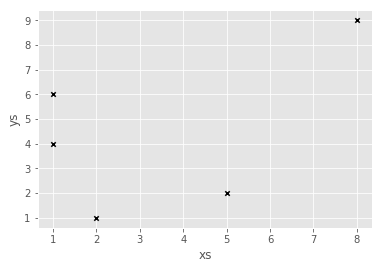

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

df = pd.DataFrame({"xs": [1, 5, 2, 8, 1],
                  "ys": [4, 2, 1, 9, 6]})
df.plot.scatter("xs", "ys", color="black", marker="x")

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

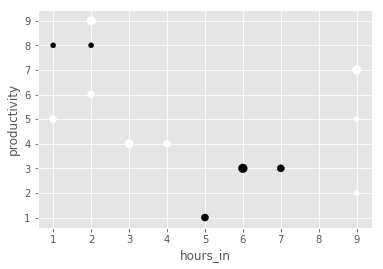

In [41]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
df.plot.scatter("hours_in", "productivity", s = df.happiness * 25, c = df.caffienated)

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

(-1, 12)

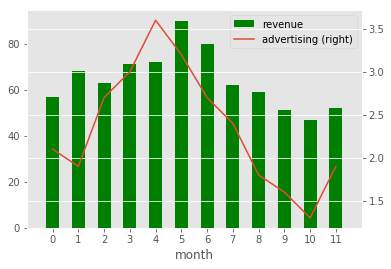

In [42]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color="green")
df.plot.line("month", "advertising", secondary_y=True, ax=ax)
ax.set_xlim((-1, 12))

Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [43]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [44]:
df = day_stock_data()
print(df.head())
df.set_index("time", inplace=True)
agg = df.resample("H").ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = (agg.close > agg.open).map({True: "green", False: "red"})
agg.head()

                 time       price
0 2018-06-07 09:30:00  100.000000
1 2018-06-07 09:30:03  100.079709
2 2018-06-07 09:30:05  100.118411
3 2018-06-07 09:30:07  100.097157
4 2018-06-07 09:30:20  100.076655


,open,high,low,close,color
time,,,,,
2018-06-07 09:00:00,100.000000,100.199909,97.342192,98.199268,red
2018-06-07 10:00:00,98.285983,100.546976,97.120538,100.148395,green
2018-06-07 11:00:00,100.203030,100.580020,96.843052,97.283730,red
2018-06-07 12:00:00,97.370823,99.443836,97.196115,97.635072,green
2018-06-07 13:00:00,97.694644,100.135848,97.694644,100.135848,green


**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

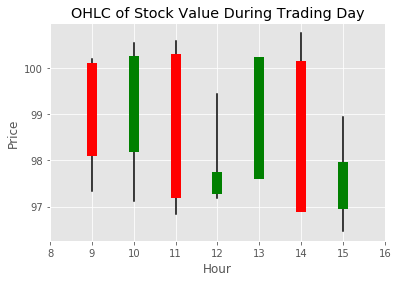

In [45]:
plot_candlestick(agg)

*More exercises to follow soon...*